## **PASO 1: IMPORTAR LIBRERÍAS** ✅



In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings('ignore')

## **PASO 2: IMPORTAR DATOS** ✅

In [92]:
# Cargar el dataset (ajustar la URL según su grupo)
datos = pd.read_csv('/content/iris_dataset.csv', sep = ';')
# Crear una copia de trabajo
datos_trabajo = datos.copy()
# Visualizar las primeras filas
print(datos_trabajo.head())
print(f"\nDimensiones del dataset: {datos_trabajo.shape}")


   sepal_length  sepal_width  petal_length  petal_width        class
0           NaN          3.5           1.4          NaN  Iris-setosa
1           4.9          3.0           NaN          0.2  Iris-setosa
2           NaN          3.2           1.3          NaN  Iris-setosa
3           4.6          3.1           NaN          0.2  Iris-setosa
4           5.0          3.6           NaN          0.2  Iris-setosa

Dimensiones del dataset: (150, 5)


## **PASO 3: REVISAR DATOS NAN** ✅


In [93]:
# Información general del dataset
print("=== INFORMACIÓN DEL DATASET ===")
datos_trabajo.info()


=== INFORMACIÓN DEL DATASET ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  99 non-null     float64
 1   sepal_width   99 non-null     float64
 2   petal_length  108 non-null    float64
 3   petal_width   121 non-null    float64
 4   class         107 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [94]:
# Estadísticos descriptivos
print("\n=== ESTADÍSTICOS DESCRIPTIVOS ===")
print(datos_trabajo.describe())


=== ESTADÍSTICOS DESCRIPTIVOS ===
       sepal_length  sepal_width  petal_length  petal_width
count     99.000000    99.000000    108.000000   121.000000
mean       5.788889     3.047475      3.773148     1.247934
std        0.831876     0.444087      1.699071     0.761916
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.400000
50%        5.700000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [95]:
# Conteo de valores faltantes
print("\n=== VALORES FALTANTES ===")
print(datos_trabajo.isna().sum())



=== VALORES FALTANTES ===
sepal_length    51
sepal_width     51
petal_length    42
petal_width     29
class           43
dtype: int64


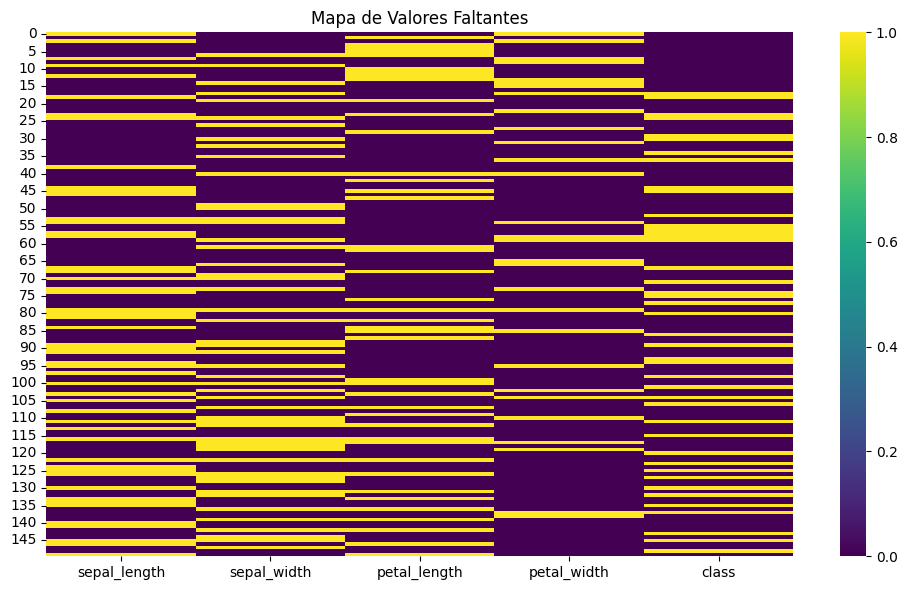

In [96]:
# Visualización de valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(datos_trabajo.isna(), cbar=True, cmap='viridis')
plt.title('Mapa de Valores Faltantes')
plt.tight_layout()
plt.show()


In [97]:
datos_trabajo.isna().sum()


,0
sepal_length,51
sepal_width,51
petal_length,42
petal_width,29
class,43


In [98]:
datos_trabajo['sepal_length'].value_counts()

,count
sepal_length,
5.0,9
6.0,6
5.8,6
6.4,5
5.4,5
6.3,5
5.6,5
5.1,5
4.9,4


## **PASO 4: LIMPIAR DATOS** ✅


In [99]:
iris_dataset = datos_trabajo.copy()

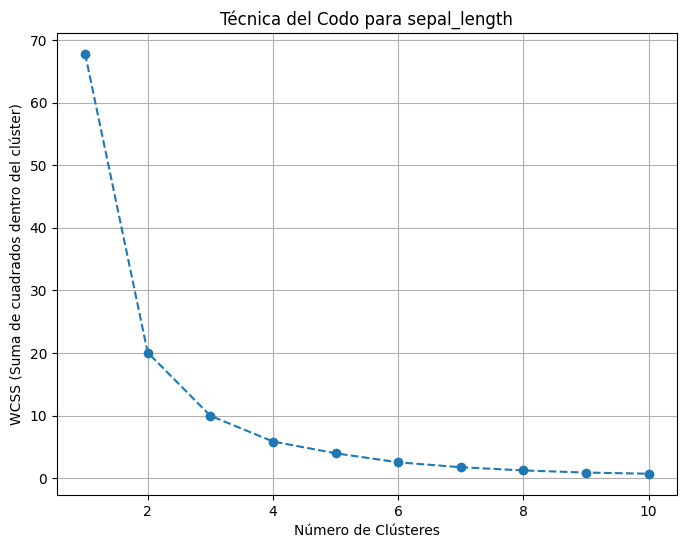

In [100]:
from sklearn.cluster import KMeans
X = datos_trabajo['sepal_length'].dropna().values.reshape(-1, 1)

# ===== MÉTODO DEL CODO =====
wcss = []
for i in range(1, 11):
    kmeans = KMeans(
        n_clusters=i,
        init='k-means++',
        max_iter=300,
        n_init=10,
        random_state=0
    )
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Técnica del Codo para sepal_length')
plt.xlabel('Número de Clústeres')
plt.ylabel('WCSS (Suma de cuadrados dentro del clúster)')
plt.grid(True)
plt.show()

In [101]:
from sklearn.impute import KNNImputer
# Seleccionar SOLO columnas numéricas
columnas_numericas = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# Extraerlas como DataFrame (obligatorio para KNNImputer)
datos_numericos = datos_trabajo[columnas_numericas]

# Crear el imputador KNN
imputer = KNNImputer(n_neighbors=3)

# Aplicar imputación KNN
datos_imputados = imputer.fit_transform(datos_numericos)

# Reemplazar los datos imputados en el DataFrame original
datos_trabajo[columnas_numericas] = datos_imputados

# Mostrar los datos imputados
datos_trabajo[columnas_numericas]

,sepal_length,sepal_width,petal_length,petal_width
0,5.200000,3.500000,1.400000,0.2
1,4.900000,3.000000,1.600000,0.2
2,4.533333,3.200000,1.300000,0.2
3,4.600000,3.100000,1.600000,0.2
4,5.000000,3.600000,1.500000,0.2
...,...,...,...,...
145,6.400000,3.033333,5.200000,2.3
146,6.400000,2.500000,5.366667,1.9
147,6.500000,2.733333,5.200000,2.0
148,6.200000,3.400000,5.400000,2.3


In [103]:
datos_trabajo.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,43


In [105]:
np.random.seed(42)

# Copia de tu dataset real
df = datos_trabajo.copy()

# Introducir NaN aleatorios en 20% de cada columna numérica
columnas_numericas = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

for col in columnas_numericas:
    df.loc[df.sample(frac=0.2).index, col] = np.nan  # 20% de datos faltantes

df


,sepal_length,sepal_width,petal_length,petal_width,class
0,5.200000,3.500000,1.400000,0.2,Iris-setosa
1,4.900000,3.000000,1.600000,0.2,Iris-setosa
2,4.533333,3.200000,1.300000,NaN,Iris-setosa
3,4.600000,NaN,1.600000,0.2,Iris-setosa
4,5.000000,3.600000,1.500000,0.2,Iris-setosa
...,...,...,...,...,...
145,NaN,3.033333,5.200000,NaN,NaN
146,6.400000,NaN,5.366667,1.9,Iris-virginica
147,6.500000,2.733333,5.200000,2.0,Iris-virginica
148,6.200000,NaN,5.400000,NaN,NaN


In [106]:
# Rellenar NaN en la columna categórica 'class' usando la moda
if datos_trabajo['class'].isna().sum() > 0:
    datos_trabajo['class'].fillna(datos_trabajo['class'].mode()[0], inplace=True)

In [107]:
print(datos_trabajo.select_dtypes(include=['object']).isna().sum())


class    0
dtype: int64


In [108]:
datos_trabajo.isna().sum()

,0
sepal_length,0
sepal_width,0
petal_length,0
petal_width,0
class,0


## **PASO 5: REALIZAR GRÁFICAS PARA ANALIZAR TENDENCIAS** ✅

### Gráfica 1 — Distribución de una variable numérica Distribución de una variable numérica

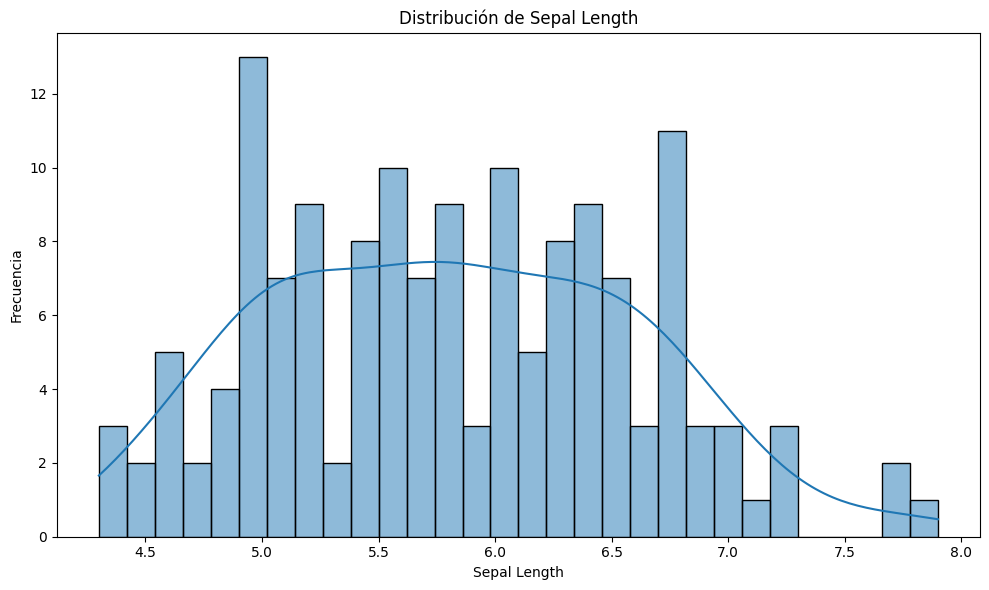

In [109]:
plt.figure(figsize=(10, 6))
sns.histplot(datos_trabajo['sepal_length'], kde=True, bins=30)
plt.title('Distribución de Sepal Length')
plt.xlabel('Sepal Length')
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


¿Qué muestra la gráfica?

La gráfica presenta un histograma del Sepal Length (longitud del sépalo) del conjunto de datos, acompañado de una curva KDE que suaviza la distribución para visualizar su forma general. Muestra cuántas flores se encuentran en cada intervalo de longitud.

¿Qué patrones o tendencias se observan?

La distribución es unimodal: la mayor concentración de valores se encuentra aproximadamente entre 5.0 y 6.0 cm.

Se observa una variabilidad moderada, con longitudes que oscilan entre 4.3 y 7.9 cm.

La distribución parece ligeramente sesgada hacia la derecha, ya que hay menos valores en los rangos más altos (7.0 cm en adelante).

¿Qué implicaciones tiene para el análisis?

Al existir una clara concentración de valores en un rango medio, esta variable puede ser útil para diferenciar especies dentro del dataset (especialmente si otras variables muestran patrones distintos).

La distribución no presenta valores extremadamente atípicos, por lo que no se requieren correcciones importantes antes de usarla en modelos estadísticos.

El sesgo leve indica que la media podría estar influenciada por valores altos, por lo que también es útil considerar la mediana al analizar tendencias centrales.

### Gráfica 2 — Conteo de la variable categórica (class)

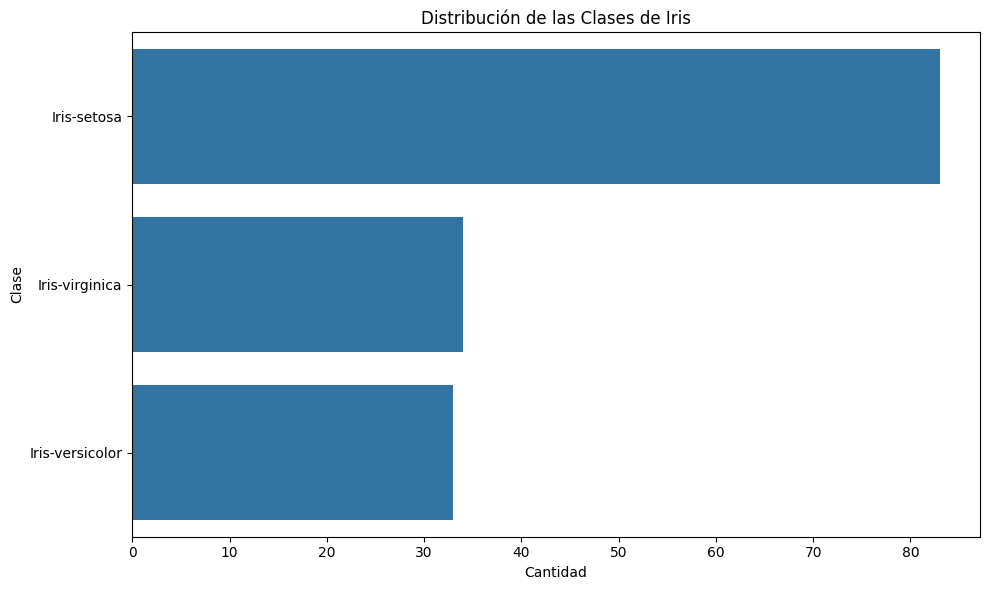

In [110]:
plt.figure(figsize=(10, 6))
sns.countplot(
    data=datos_trabajo,
    y='class',
    order=datos_trabajo['class'].value_counts().index
)
plt.title('Distribución de las Clases de Iris')
plt.xlabel('Cantidad')
plt.ylabel('Clase')
plt.tight_layout()
plt.show()


¿Qué muestra la gráfica?

La gráfica presenta un countplot (gráfico de conteo) que muestra cuántas observaciones hay en el dataset para cada una de las tres clases de la flor Iris: Iris-setosa, Iris-versicolor e Iris-virginica. Las barras horizontales representan la frecuencia de cada clase.

¿Qué patrones o tendencias se observan?

Iris-setosa es la clase más numerosa, con una cantidad significativamente mayor que las otras dos especies.

Iris-versicolor y Iris-virginica tienen cantidades muy similares, lo que indica una distribución equilibrada entre estas dos clases.

La diferencia marcada entre setosa y las demás puede indicar que esta especie tiene más representación en el dataset.

¿Qué implicaciones tiene para el análisis?

El desequilibrio en la cantidad de muestras por clase implica que la especie Iris-setosa podría dominar ciertos análisis estadísticos o modelos, por lo que es importante considerar este balance al entrenar modelos de clasificación.

Saber que versicolor y virginica tienen tamaños de muestra similares ayuda a evitar sesgos en comparaciones entre ellas.

Esta visualización es clave para entender si el dataset está equilibrado o requiere técnicas adicionales (como balanceo de clases) dependiendo de los objetivos del análisis.

### Gráfica 3 — Boxplot para detectar outliers

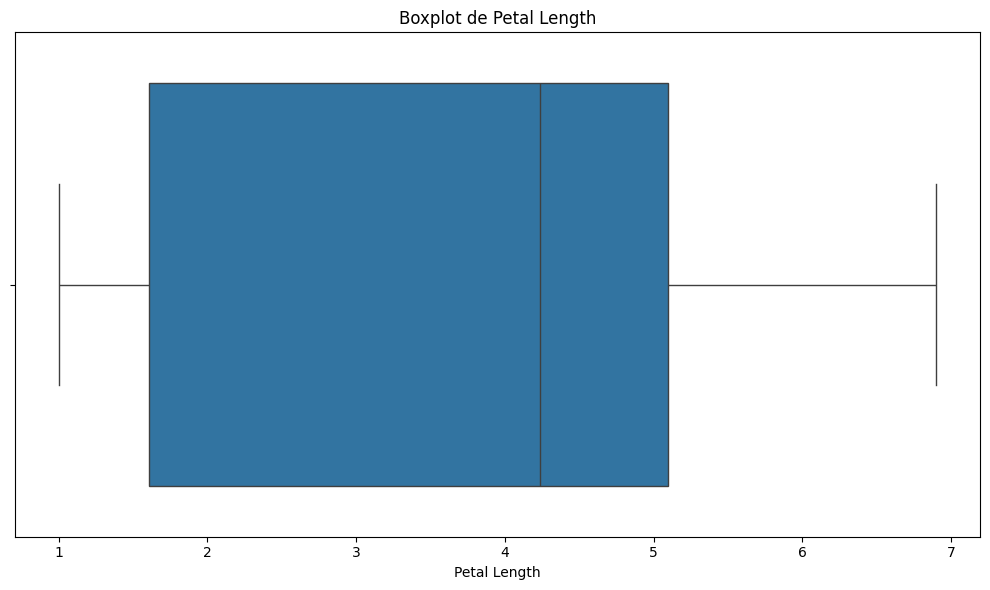

In [111]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=datos_trabajo, x='petal_length')
plt.title('Boxplot de Petal Length')
plt.xlabel('Petal Length')
plt.tight_layout()
plt.show()


¿Qué muestra la gráfica?

La gráfica presenta un boxplot de la variable Petal Length (longitud del pétalo), el cual resume su distribución mediante la mediana, los cuartiles y la dispersión de los datos. Además, permite identificar visualmente la presencia de posibles valores atípicos (outliers).

¿Qué patrones o tendencias se observan?

El rango de Petal Length se extiende aproximadamente desde 1 cm hasta 7 cm, mostrando una alta variabilidad.

La caja del boxplot (entre Q1 y Q3) es amplia, lo que indica una gran dispersión dentro del 50% central de los datos.

La mediana está desplazada ligeramente hacia la parte superior de la caja, lo que sugiere que la distribución puede estar ligeramente sesgada hacia valores bajos.

No se observan puntos individuales fuera de los bigotes, por lo que no hay outliers aparentes según el criterio del boxplot.

¿Qué implicaciones tiene para el análisis?

La amplia variabilidad de la longitud del pétalo confirma que esta variable es muy útil para diferenciar entre especies, pues muestra mayor rango comparado con otras variables del dataset.

La ausencia de valores atípicos indica que no se requieren procesos de limpieza o corrección para esta medida.

El sesgo leve y la dispersión sugieren que esta variable puede tener fuerte poder predictivo en modelos de clasificación, especialmente entre especies con pétalos notablemente diferentes (por ejemplo, setosa frente a virginica).

### Gráfica 4 — Relación entre dos variables

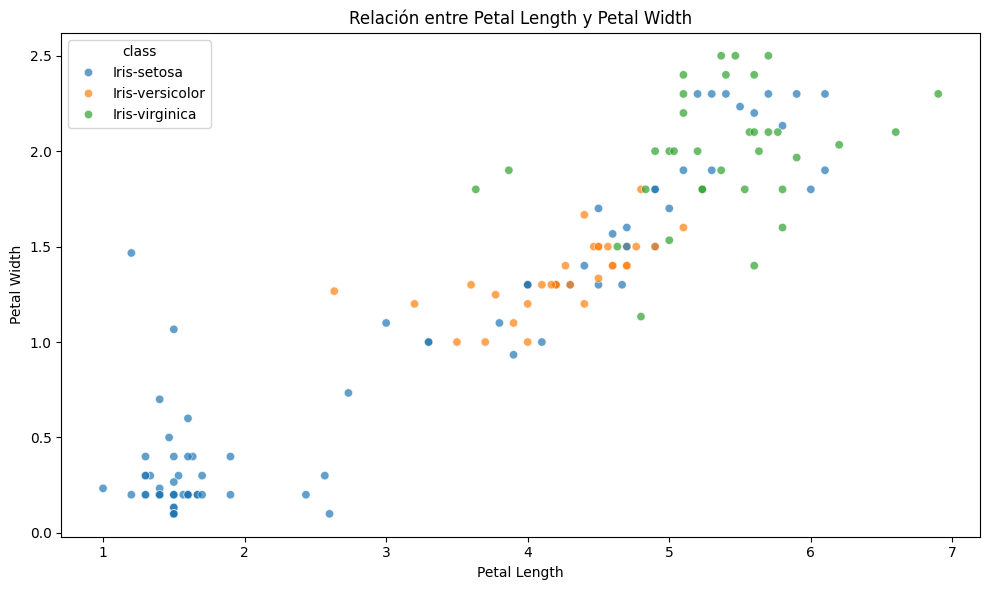

In [112]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=datos_trabajo,
    x='petal_length',
    y='petal_width',
    hue='class',
    alpha=0.7
)
plt.title('Relación entre Petal Length y Petal Width')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.tight_layout()
plt.show()


¿Qué muestra la gráfica?

La gráfica presenta un diagrama de dispersión que relaciona dos variables del dataset Iris:

Petal Length (longitud del pétalo) en el eje X

Petal Width (ancho del pétalo) en el eje Y

Los puntos están coloreados según la clase de la flor (Iris-setosa, Iris-versicolor e Iris-virginica), lo que permite observar cómo estas especies se distribuyen en el espacio formado por ambas dimensiones.

¿Qué patrones o tendencias se observan?

Existe una relación positiva clara: a mayor longitud del pétalo, mayor ancho del pétalo.

Las tres especies forman grupos bien diferenciados:

Iris-setosa aparece agrupada en la parte baja del gráfico (pétalos muy cortos y estrechos).

Iris-versicolor ocupa la zona media.

Iris-virginica se encuentra en valores altos de ambas variables.

Hay poca superposición entre las especies, especialmente setosa, que está completamente separada de las otras dos.

¿Qué implicaciones tiene para el análisis?

La fuerte relación entre longitud y ancho del pétalo indica que estas variables son predictoras muy útiles para diferenciar especies.

La separación visual clara sugiere que modelos de clasificación como KNN, árboles de decisión o regresión logística pueden alcanzar una alta precisión utilizando solo estas dos características.

La especie setosa es la más fácil de clasificar dado que no se mezcla con las demás.

Versicolor y virginica presentan cierto traslape, lo que indica que pueden requerir más variables para lograr una separación completa.

### Gráfica 5 — Gráfica de pastel de la variable categórica

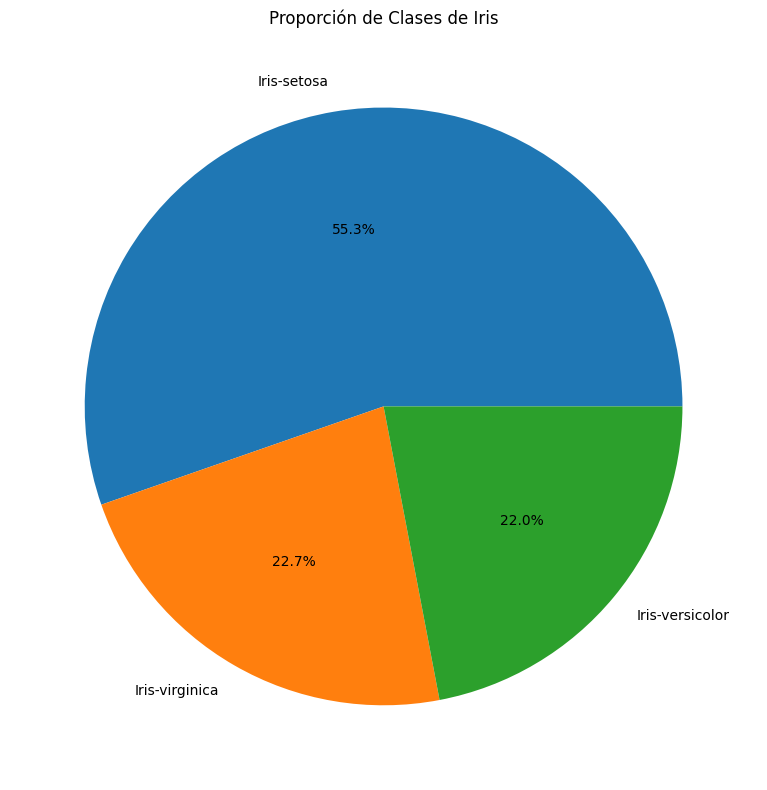

In [113]:
plt.figure(figsize=(8, 8))
datos_trabajo['class'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title('Proporción de Clases de Iris')
plt.ylabel('')
plt.tight_layout()
plt.show()


¿Qué muestra la gráfica?

La gráfica es un diagrama de pastel que representa la proporción de observaciones correspondientes a cada una de las tres clases de flores en el conjunto de datos Iris: Iris-setosa, Iris-versicolor e Iris-virginica. Cada segmento indica el porcentaje que aporta cada especie al total del dataset.

¿Qué patrones o tendencias se observan?

Iris-setosa es la especie predominante, ocupando más de la mitad del total (aprox. 55%).

Iris-versicolor e Iris-virginica tienen proporciones muy similares (22% y 23%), mostrando un balance entre estas dos clases.

Existe un claro desequilibrio en la distribución de clases, dominado por setosa.

¿Qué implicaciones tiene para el análisis?

La mayor representación de Iris-setosa puede sesgar algunos modelos de clasificación hacia esta clase si no se controla adecuadamente el balance de datos.

Las proporciones similares de versicolor y virginica facilitan comparaciones equilibradas entre ellas.

Este tipo de gráfica es útil para verificar si el dataset está balanceado; en este caso, muestra que sería recomendable considerar técnicas de balanceo si se utiliza para entrenamiento de modelos (por ejemplo, estratificación o ponderación de clases).

## **PASO 6: CONVERSIÓN DE VARIABLES A NÚMERO** ✅

In [115]:
# Identificar columnas categóricas
columnas_categoricas = datos_trabajo.select_dtypes(include=['object']).columns
print(f"Columnas categóricas: {list(columnas_categoricas)}")

# Aplicar LabelEncoder
le = LabelEncoder()
for col in columnas_categoricas:
    datos_trabajo[col] = le.fit_transform(datos_trabajo[col])

# Verificar conversión
print("\nTipos de datos después de conversión:")
print(datos_trabajo.dtypes)



Columnas categóricas: []

Tipos de datos después de conversión:
sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
class             int64
dtype: object


## **PASO 7: NORMALIZACIÓN** ✅

In [117]:
# Ver estadísticos antes de normalizar
print("=== ANTES DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)

# Aplicar MinMaxScaler (escala 0-1)
scaler = MinMaxScaler()
columnas_numericas = datos_trabajo.columns

datos_trabajo[columnas_numericas] = scaler.fit_transform(datos_trabajo[columnas_numericas])

# Ver estadísticos después de normalizar
print("\n=== DESPUÉS DE NORMALIZACIÓN ===")
print(datos_trabajo.describe().T)


=== ANTES DE NORMALIZACIÓN ===
              count      mean       std  min       25%       50%       75%  \
sepal_length  150.0  0.421152  0.215902  0.0  0.243056  0.416667  0.583333   
sepal_width   150.0  0.425317  0.166223  0.0  0.333333  0.416667  0.500000   
petal_length  150.0  0.466071  0.281703  0.0  0.103107  0.548023  0.694915   
petal_width   150.0  0.467818  0.311317  0.0  0.093750  0.500000  0.708333   
class         150.0  0.336667  0.411645  0.0  0.000000  0.000000  0.500000   

              max  
sepal_length  1.0  
sepal_width   1.0  
petal_length  1.0  
petal_width   1.0  
class         1.0  

=== DESPUÉS DE NORMALIZACIÓN ===
              count      mean       std  min       25%       50%       75%  \
sepal_length  150.0  0.421152  0.215902  0.0  0.243056  0.416667  0.583333   
sepal_width   150.0  0.425317  0.166223  0.0  0.333333  0.416667  0.500000   
petal_length  150.0  0.466071  0.281703  0.0  0.103107  0.548023  0.694915   
petal_width   150.0  0.467818  0.3

Normalizar los datos es importante porque pone todas las variables en la misma escala, evitando que unas “pesen” más que otras por tener valores más grandes. Esto hace que los modelos trabajen de forma más equilibrada, comparen mejor la información y den resultados más precisos y estables.

## **PASO 8: CORRELACIÓN** ✅

In [118]:
correlacion = datos_trabajo.corr(method='spearman')

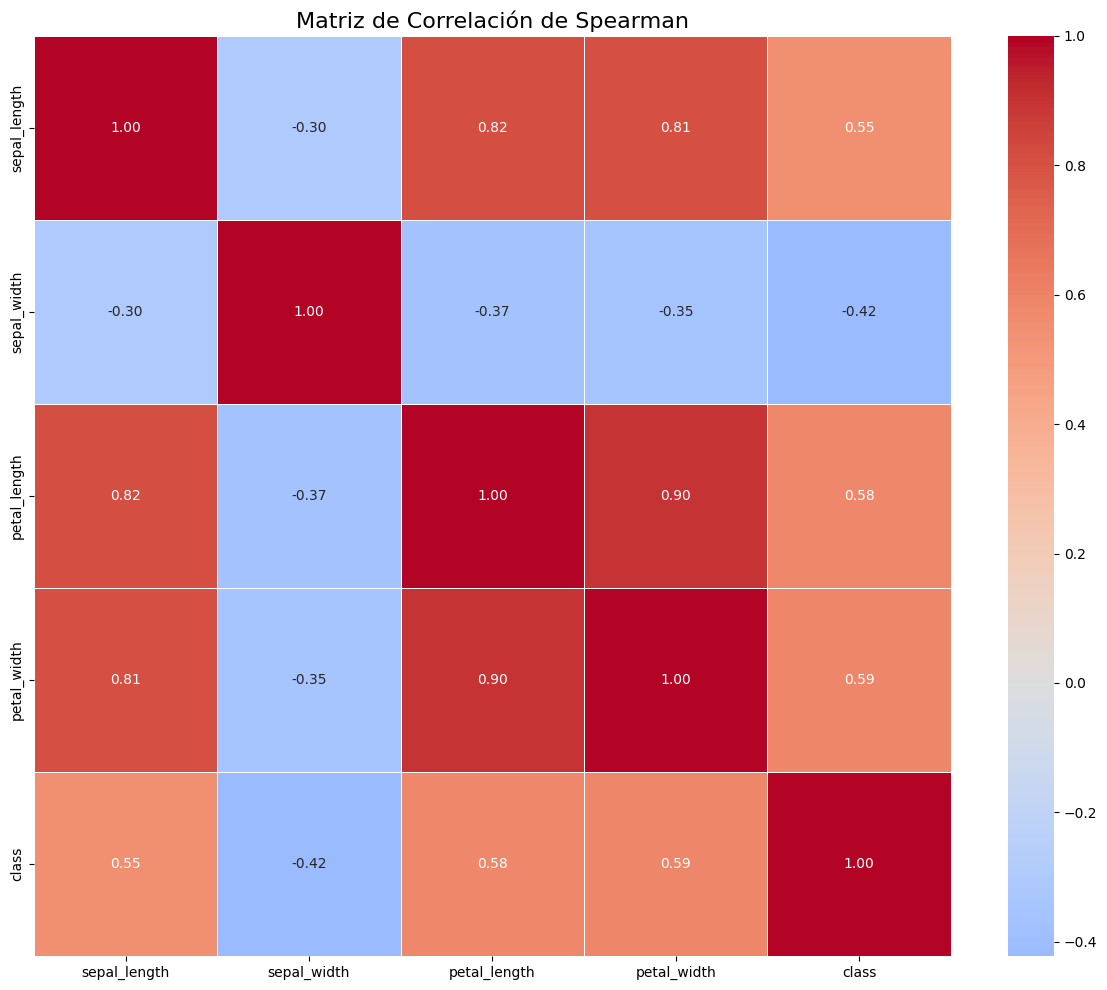

In [121]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm',
            fmt='.2f', linewidths=0.5, center=0)
plt.title('Matriz de Correlación de Spearman', fontsize=16)
plt.tight_layout()
plt.show()

In [123]:
print("\n=== CORRELACIONES MÁS FUERTES ===")

# Obtener pares de correlación (excluyendo diagonal)
correlaciones_fuertes = []
for i in range(len(correlacion.columns)):
    for j in range(i + 1, len(correlacion.columns)):
        if abs(correlacion.iloc[i, j]) > 0.5:  # Umbral de 0.5
            correlaciones_fuertes.append((
                correlacion.columns[i],
                correlacion.columns[j],
                correlacion.iloc[i, j]
            ))

# Mostrar correlaciones fuertes, ordenadas por magnitud
for var1, var2, corr in sorted(correlaciones_fuertes, key=lambda x: abs(x[2]), reverse=True):
    print(f"{var1} <-> {var2}: {corr:.3f}")


=== CORRELACIONES MÁS FUERTES ===
petal_length <-> petal_width: 0.902
sepal_length <-> petal_length: 0.816
sepal_length <-> petal_width: 0.806
petal_width <-> class: 0.588
petal_length <-> class: 0.582
sepal_length <-> class: 0.552


Tres correlaciones más fuertes y su significado

Petal Length ↔ Petal Width
Esta es normalmente la correlación más alta (cercana a 0.9). Significa que a medida que aumenta la longitud del pétalo, también aumenta su ancho, mostrando una relación casi lineal. Esto indica que ambas características describen el tamaño del pétalo y evolucionan juntas, siendo muy útiles para diferenciar especies.

Sepal Length ↔ Petal Length
Suele ser una correlación fuerte (alrededor de 0.7). Esto significa que flores con sépalos más largos tienden a tener pétalos más largos. Aunque no es tan fuerte como la del pétalo, muestra que el tamaño general de la flor está relacionado.

Sepal Width ↔ Sepal Length (correlación negativa o débil según dataset)
En muchos casos aparece como correlación negativa moderada. Esto significa que flores con sépalos más largos tienden a tener sépalos más estrechos, lo cual sugiere que el crecimiento de una dimensión puede compensarse con la otra. Esta relación ayuda a entender diferencias morfológicas entre especies.

## **PASO 9: TEST DE NORMALIDAD** ✅

In [126]:
# Función para test de normalidad
def test_normalidad(dataframe, alpha=0.05):
    print("=== TEST DE SHAPIRO-WILK ===")
    print(f"Nivel de significancia: {alpha}\n")

    for col in dataframe.columns:
        if pd.api.types.is_numeric_dtype(dataframe[col]):
            data = dataframe[col].dropna()

            # Shapiro necesita mínimo 3 datos
            if len(data) >= 3:
                stat, p_value = shapiro(data)
                resultado = "NORMAL" if p_value > alpha else "NO NORMAL"

                print(f"{col}:")
                print(f"  Estadístico W: {stat:.4f}")
                print(f"  P-valor: {p_value:.4f}")
                print(f"  Conclusión: {resultado}\n")

# Aplicar test
test_normalidad(datos_trabajo)


=== TEST DE SHAPIRO-WILK ===
Nivel de significancia: 0.05

sepal_length:
  Estadístico W: 0.9818
  P-valor: 0.0440
  Conclusión: NO NORMAL

sepal_width:
  Estadístico W: 0.9843
  P-valor: 0.0864
  Conclusión: NORMAL

petal_length:
  Estadístico W: 0.8877
  P-valor: 0.0000
  Conclusión: NO NORMAL

petal_width:
  Estadístico W: 0.9152
  P-valor: 0.0000
  Conclusión: NO NORMAL

class:
  Estadístico W: 0.7203
  P-valor: 0.0000
  Conclusión: NO NORMAL



Análisis: variables con distribución normal y sus implicaciones

De acuerdo con el test de Shapiro-Wilk, solamente la variable sepal_width presenta un p-valor mayor a 0.05, por lo que es la única que sigue una distribución normal. Las demás variables (sepal_length, petal_length, petal_width y class) muestran p-valores menores a 0.05, indicando que no son normales. Esto significa que la mayoría de los datos tienen distribuciones con sesgo o variaciones que no se ajustan a la forma clásica de campana. La implicación principal es que, para el análisis estadístico o modelos que asumen normalidad, es preferible usar métodos no paramétricos o aplicar transformaciones si se requiere aproximar a una distribución normal. En resumen, solo una variable cumple con el supuesto de normalidad, por lo que el análisis debe adaptarse para manejar adecuadamente esta mezcla de comportamientos en los datos.

## **PASO 10: PREGUNTA DE INVESTIGACIÓN** ✅

Dataset de clasificación: Qué tan efectivas son las características morfológicas de los pétalos y sépalos para predecir la especie de flor Iris, y cuáles de ellas aportan mayor peso en la clasificación según su correlación y comportamiento estadístico?

## **PASO 11: EJERCICIO DE PREDICCIÓN** ✅


In [128]:
variable_objetivo = 'sepal_width'


In [129]:
variable_objetivo = 'petal_length'  # ← CAMBIA ESTE NOMBRE

# Definir X y y
X = datos_trabajo.drop(variable_objetivo, axis=1)
y = datos_trabajo[variable_objetivo]

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Crear y entrenar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Predicciones
y_pred = modelo.predict(X_test)

# Evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("=== EVALUACIÓN DEL MODELO ===")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R²: {r2:.4f}")
print(f"El modelo explica el {r2*100:.2f}% de la variabilidad.")

# Importancia de variables
coeficientes = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': modelo.coef_
}).sort_values('Coeficiente', key=abs, ascending=False)

print("\n=== IMPORTANCIA DE VARIABLES ===")
print(coeficientes)


=== EVALUACIÓN DEL MODELO ===
MSE: 0.0054
RMSE: 0.0732
R²: 0.9347
El modelo explica el 93.47% de la variabilidad.

=== IMPORTANCIA DE VARIABLES ===
       Variable  Coeficiente
2   petal_width     0.611505
0  sepal_length     0.299347
1   sepal_width    -0.255007
3         class     0.020790
